In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/sajiapple/Documents'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/Users/sajiapple/Documents/India_boundary.shx
/Users/sajiapple/Documents/.Rhistory
/Users/sajiapple/Documents/nutritional-analysis-why-and-how-ppt-1114c3.pptx
/Users/sajiapple/Documents/NUTRITION PROJECT.pptx
/Users/sajiapple/Documents/nutritional-analysis-why-and-how-ppt-1114c3 (1).pptx
/Users/sajiapple/Documents/Indian_states.prj
/Users/sajiapple/Documents/.DS_Store
/Users/sajiapple/Documents/malnutrition-estimates.csv
/Users/sajiapple/Documents/Malnutrition - Data visualization.ipynb
/Users/sajiapple/Documents/.localized
/Users/sajiapple/Documents/ds
/Users/sajiapple/Documents/Untitled.ipynb
/Users/sajiapple/Documents/food.csv
/Users/sajiapple/Documents/food.csv.zip
/Users/sajiapple/Documents/India_boundary.dbf
/Users/sajiapple/Documents/food 2.csv
/Users/sajiapple/Documents/country-wise-average.csv
/Users/sajiapple/Documents/Food and Calories - Sheet1.csv
/Users/sajiapple/Documents/nutritional analysis.ipynb
/Users/sajiapple/Documents/India_boundary.prj
/Users/sajiapple/Documents/I

In [8]:
os.getcwd()

'/Users/sajiapple/Documents'

In [14]:
df_country = pd.read_csv('country-wise-average.csv')
df_country.head(10)

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750
5,ARMENIA,2.0,1.600000,3.940000,13.620000,16.120000,3.480000,204.145200
6,AUSTRALIA,3.0,0.000000,0.000000,13.875000,1.000000,0.100000,1443.074500
7,AZERBAIJAN,2.0,2.575000,5.433333,9.183333,21.816667,8.083333,740.501667
8,BAHRAIN,3.0,NaN,6.700000,7.500000,13.750000,6.950000,63.371000
9,BANGLADESH,1.0,2.813636,14.537500,0.962500,54.229167,46.266667,15837.427500


In [19]:
# Income classification is a category and can be converted to int
df_country["Income Classification"] =  df_country["Income Classification"].astype("int32")

In [20]:
df_country["Severe Wasting"].describe()

count    140.000000
mean       2.168650
std        1.708939
min        0.000000
25%        0.900000
50%        1.872500
75%        2.822727
max       11.400000
Name: Severe Wasting, dtype: float64

<Figure size 1600x800 with 0 Axes>

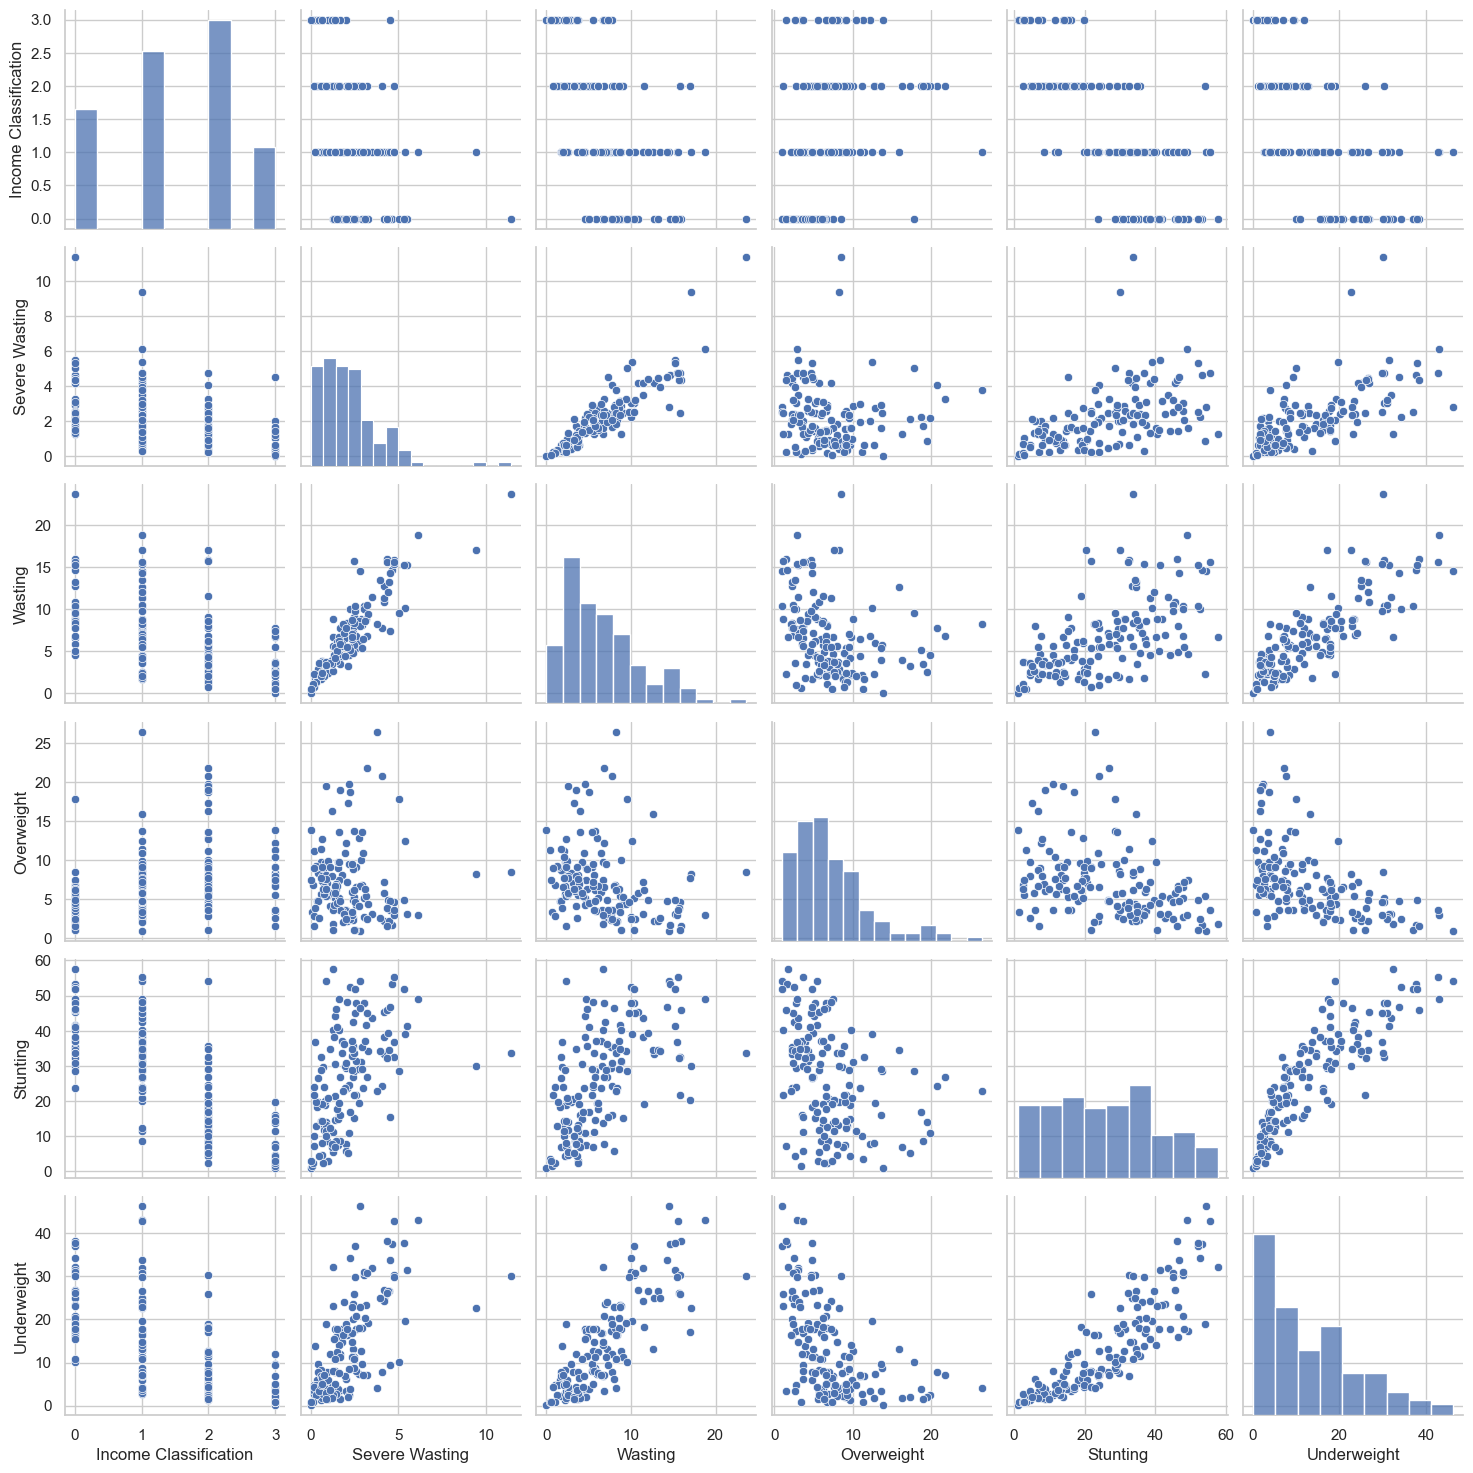

In [22]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["Income Classification","Severe Wasting","Wasting","Overweight","Stunting","Underweight" ]
sns.pairplot(df_country[cols], height = 2.5 )
plt.show();

# Severe Wasting
Severe Wasting - % of children 
aged 0–59 months who are below minus 
three standard deviations from median weight-for-height.

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

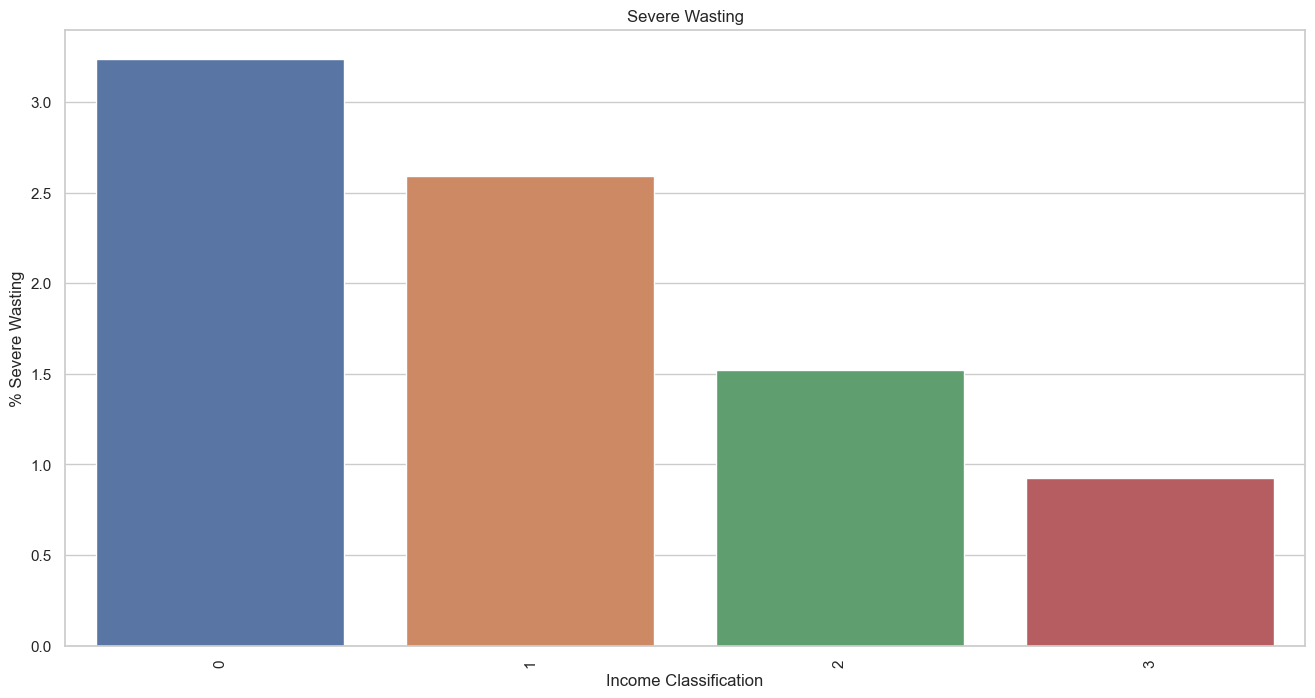

In [23]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Severe Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Severe Wasting')
ax.set_ylabel('% Severe Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [ ]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Severe Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Severe Wasting %', 'len':300,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Severe Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Wasting
Wasting – Moderate and severe: % of children aged 0–59 months who 
    are below minus two standard deviations from median weight-for-height

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

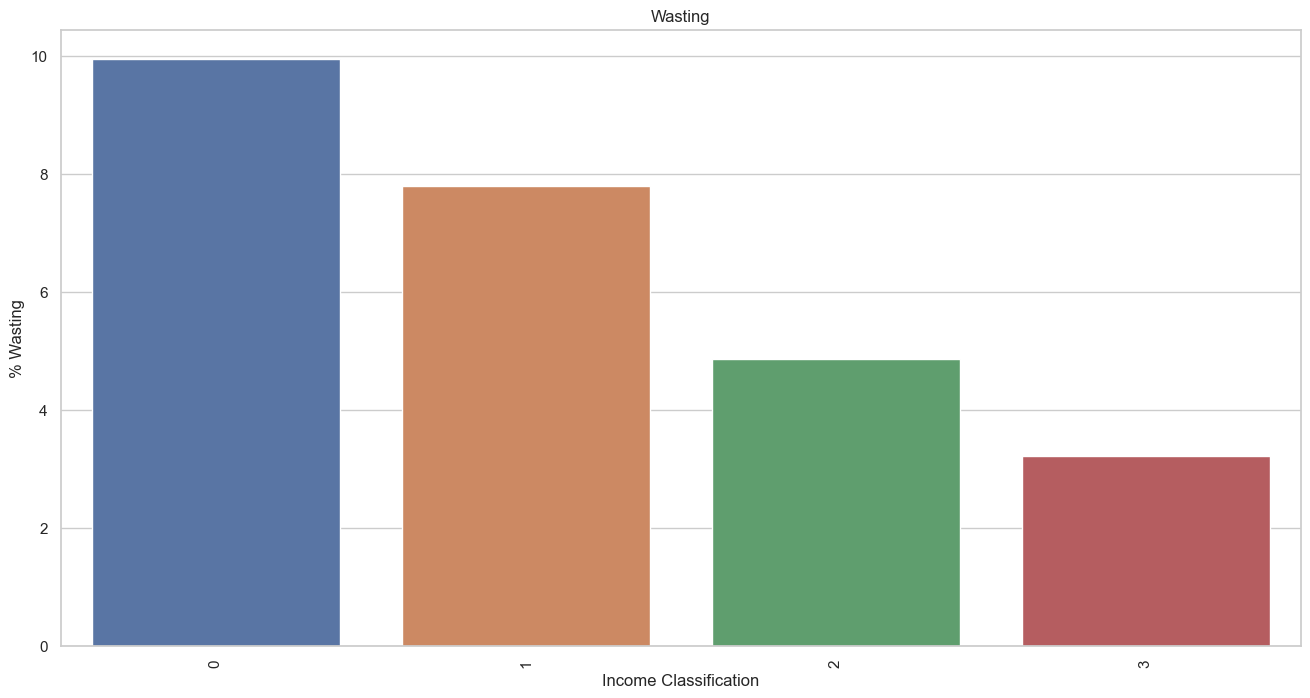

In [26]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Wasting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Wasting')
ax.set_ylabel('% Wasting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [27]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Wasting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Wasting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Wasting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Overweight
Overweight – Moderate and severe: % aged 0-59 months 
    who are above two standard deviations from median weight-for-height

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

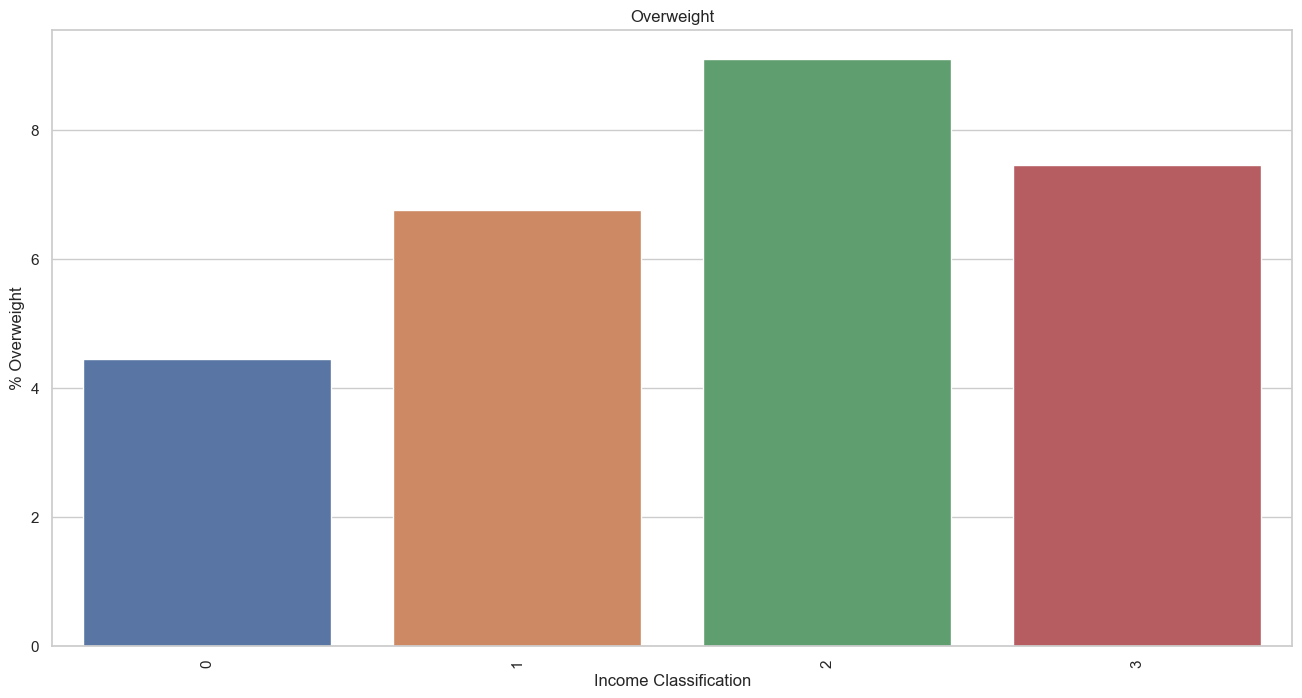

In [28]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Overweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Overweight')
ax.set_ylabel('% Overweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [30]:
#Plotting on the WorldMap using plotly
x = df_country.groupby(["Country"])["Overweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Overweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Overweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Stunting
Stunting – Moderate and severe: % of children aged 0–59 months
    who are below minus two standard deviations from median height-for-age

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

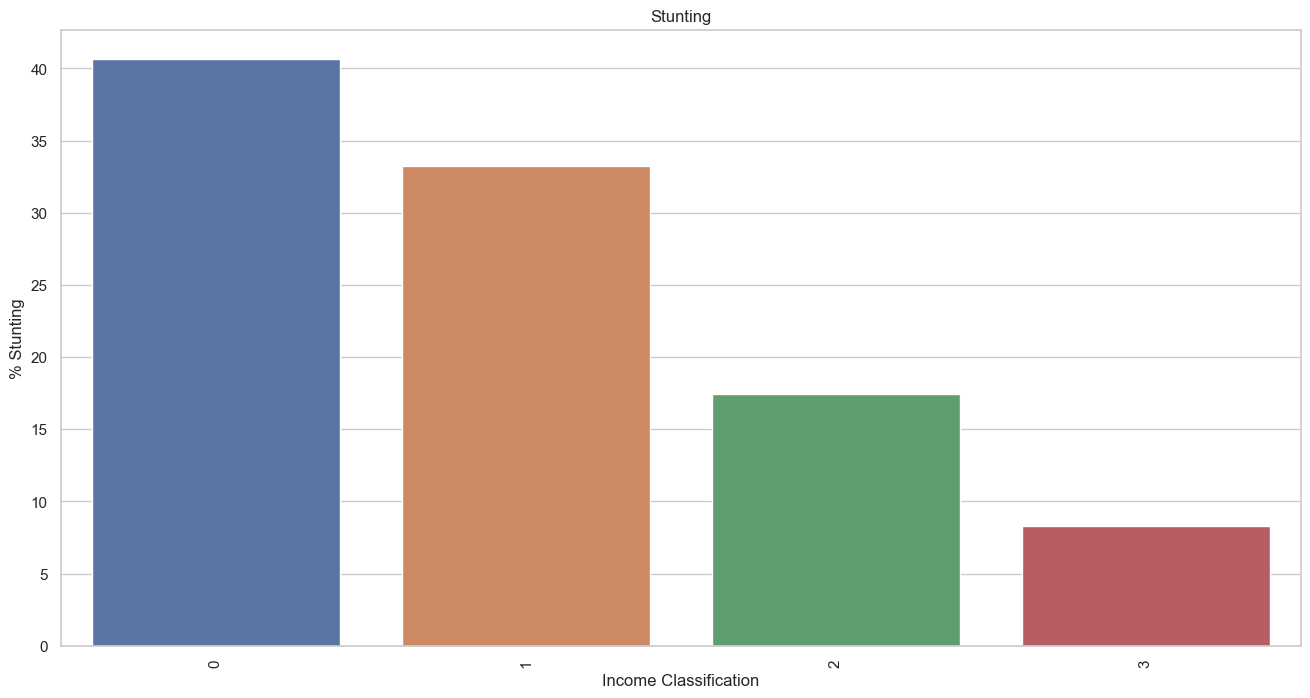

In [31]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Stunting"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Stunting')
ax.set_ylabel('% Stunting')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [32]:
x = df_country.groupby(["Country"])["Stunting"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'stunting %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="stunting % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()

# Underweight
Underweight – Moderate and severe: % of children aged 0–59 months 
    who are below minus two standard deviations from median weight-for-age

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

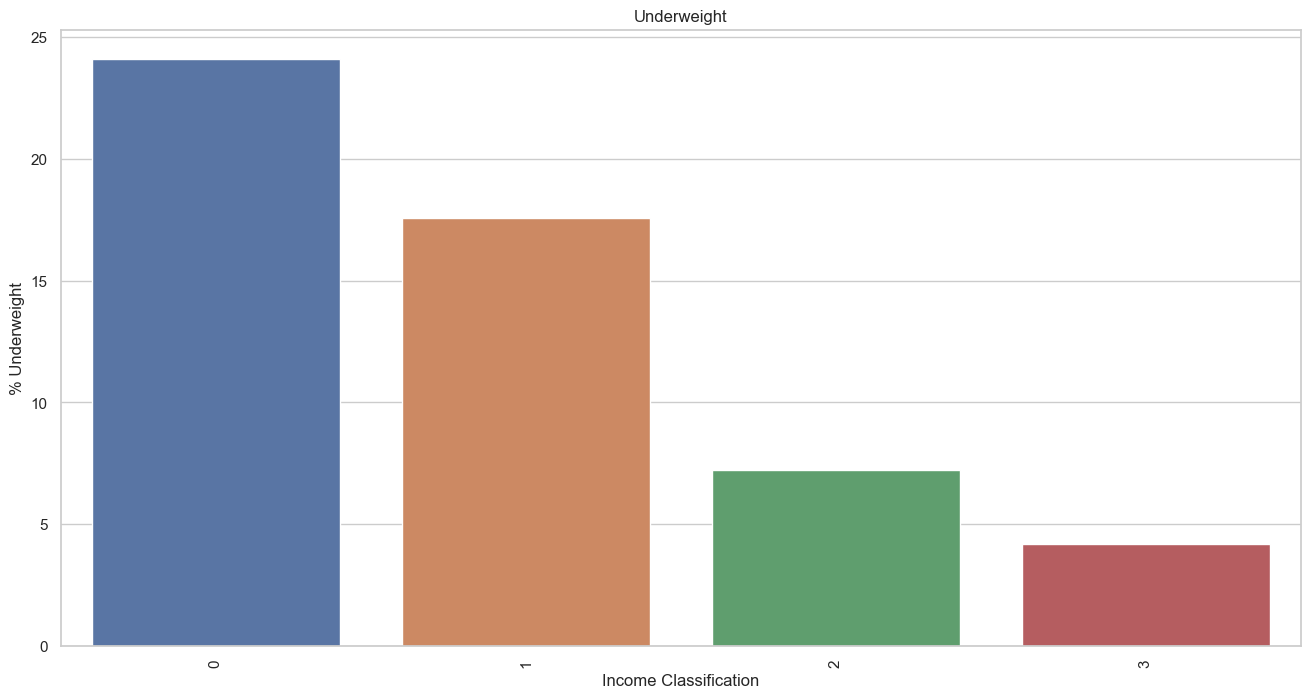

In [33]:
plt.figure(figsize=(16, 8))
x = df_country.groupby(["Income Classification"])["Underweight"].mean()
sns.set(style="whitegrid")
ax = sns.barplot(x.index, x)
ax.set_title('Underweight')
ax.set_ylabel('% Underweight')
ax.set_xlabel('Income Classification')
plt.xticks(rotation = 90)

In [34]:
x = df_country.groupby(["Country"])["Underweight"].mean()
data = dict(type = 'choropleth',
            locations = x.index,
            locationmode = 'country names',
            colorscale= 'Portland',
            text= x.index,
            z=x,
            colorbar = {'title':'Underweight %', 'len':200,'lenmode':'pixels' })
layout = dict(geo = {'scope':'world'},title="Underweight % around the world")
col_map = go.Figure(data = [data],layout = layout)
col_map.show()